## Here we do the timing analysis for the results of `core_study.py`. We want to determine the number of cpu cores we should use to run our simulations.

In [1]:
import os
import pickle
import matplotlib.pyplot as plt

In [5]:
def get_colors(num_colors):

    cmap_viridis = plt.colormaps['viridis']
    colors = [cmap_viridis(i / num_colors) for i in range(num_colors)]

    return colors

def load_results(filename):
    
    results = pickle.load(open(filename,"rb"))
    cores = results[0]
    times = results[1]

    return cores, times

resolutions = [60, 80]
filenames = ["core_study_" + str(x) + ".pkl" for x in resolutions]

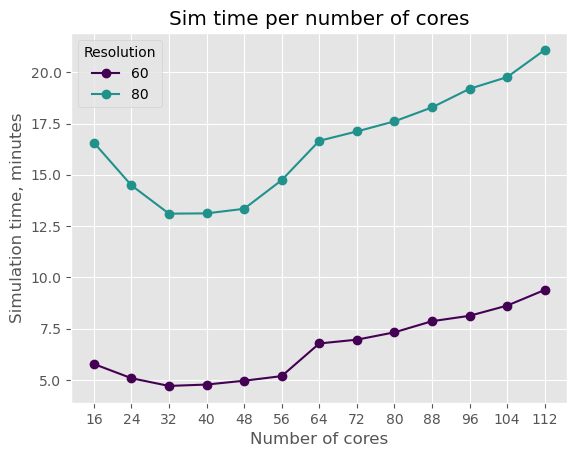

In [7]:
colors = get_colors(2)

plt.style.use("ggplot")

fig, ax = plt.subplots()

for i, f in enumerate(filenames):
    cores, times = load_results(f)
    ax.plot(cores, times, marker='o', color=colors[i], label=f"{resolutions[i]}")
    ax.set_xticks(cores)
    ax.set_xticklabels([f'{core}' for core in cores])
#ax.plot(cores_80, times_80, marker='o', color=colors[1], label="80")
ax.set_ylabel("Simulation time, minutes")
ax.set_xlabel("Number of cores")


ax.set_title(f"Sim time per number of cores")
ax.legend(title="Resolution")

### For both resolution=60 and resolution=80, the fastest sim time is with 32 cores.